# Example: Fit Canonical Phase-Type NHPP Models

This notebook loads the bundled MUSA ss1a dataset and fits an exponential NHPP model.

In [2]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat.nhpp as srm

In [3]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1.csv")
df = pd.read_csv(data_path)

data = srm.NHPPData.from_intervals(
    time=df["time"],
    fault=df["fault"],
    type=df["indicator"]
)

In [4]:
data_path = resources.files("pysrat").joinpath("datasets/musa/sys1g.csv")
df = pd.read_csv(data_path)

data = srm.NHPPData.from_counts(fault=df["fault"].to_numpy(dtype=float))

In [5]:
models = {
    "phase5": srm.CanonicalPhaseTypeNHPP(5),
    "phase10": srm.CanonicalPhaseTypeNHPP(10),
    "phase20": srm.CanonicalPhaseTypeNHPP(20),
    "phase50": srm.CanonicalPhaseTypeNHPP(50),
    "phase100": srm.CanonicalPhaseTypeNHPP(100),
    "phase200": srm.CanonicalPhaseTypeNHPP(200)
}

for model in models.values():
    model.fit(data, verbose=True)

/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
for model in models.values():
    summary = srm.eic(model, bsample=50)
    print(summary)

{'bias': 6.163991096927707, 'bias.lower': 5.2947872430532295, 'bias.upper': 7.0331949508021845, 'eic': 364.37698632822975, 'eic.lower': 362.6385786204808, 'eic.upper': 366.11539403597874}
{'bias': 8.629443748221432, 'bias.lower': 7.278890996642076, 'bias.upper': 9.979996499800787, 'eic': 356.8489001479129, 'eic.lower': 354.1477946447542, 'eic.upper': 359.5500056510716}
{'bias': 10.225882308661328, 'bias.lower': 8.429011283146988, 'bias.upper': 12.022753334175668, 'eic': 345.1617527053988, 'eic.lower': 341.5680106543701, 'eic.upper': 348.7554947564274}


/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


{'bias': inf, 'bias.lower': nan, 'bias.upper': nan, 'eic': inf, 'eic.lower': nan, 'eic.upper': nan}


/Users/okamu/Documents/pysrat/src/pysrat/nhpp/_em.py:136: UserWarning: Did not converge to MLE by max iteration.
  warnings.warn("Did not converge to MLE by max iteration.")


{'bias': inf, 'bias.lower': nan, 'bias.upper': nan, 'eic': inf, 'eic.lower': nan, 'eic.upper': nan}
{'bias': inf, 'bias.lower': nan, 'bias.upper': nan, 'eic': inf, 'eic.lower': nan, 'eic.upper': nan}


<Axes: xlabel='time', ylabel='# of faults'>

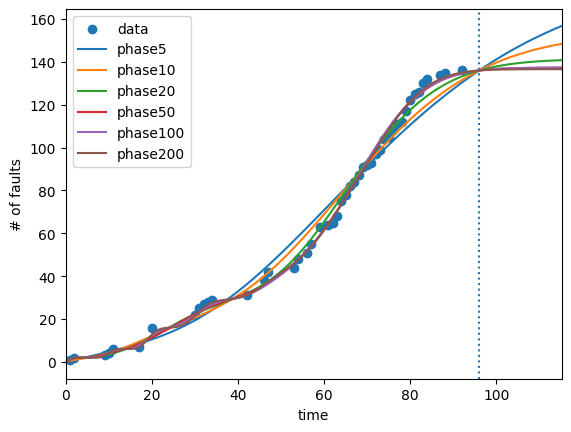

In [8]:
srm.plot_mvf(data, models)

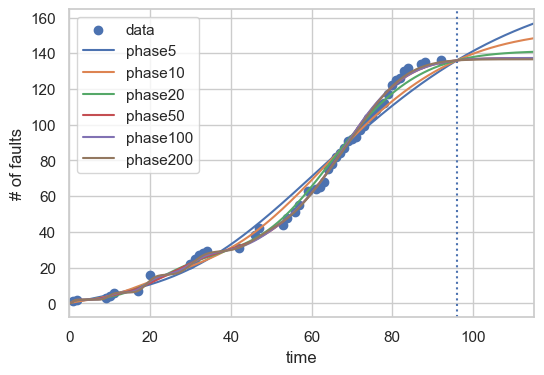

In [9]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srm.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

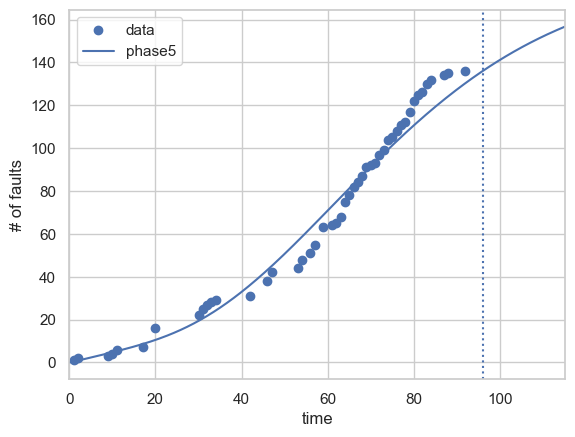

In [10]:
best_key = min(models, key=lambda k: models[k].aic_)
srm.plot_mvf(data, {best_key: models[best_key]})